In [1]:
import pandas as pd
import numpy as np
import random
from pre_normalize import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

normal_df = pd.read_csv('../data/normal1.csv')
attack_df = pd.read_csv('../data/attack1.csv')

In [2]:
normal_time = normal_df.copy()
attack_time = attack_df.copy()

In [3]:
from datetime import datetime
resampled_time = normal_time['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
resampled_time_series = pd.to_datetime(resampled_time, format='%Y-%m-%d %H:%M:%S')

df = pd.DataFrame(resampled_time_series)
df['packet'] = 1

In [5]:
df = df.set_index('timestamp')

In [6]:
df = df.resample('1S').sum()

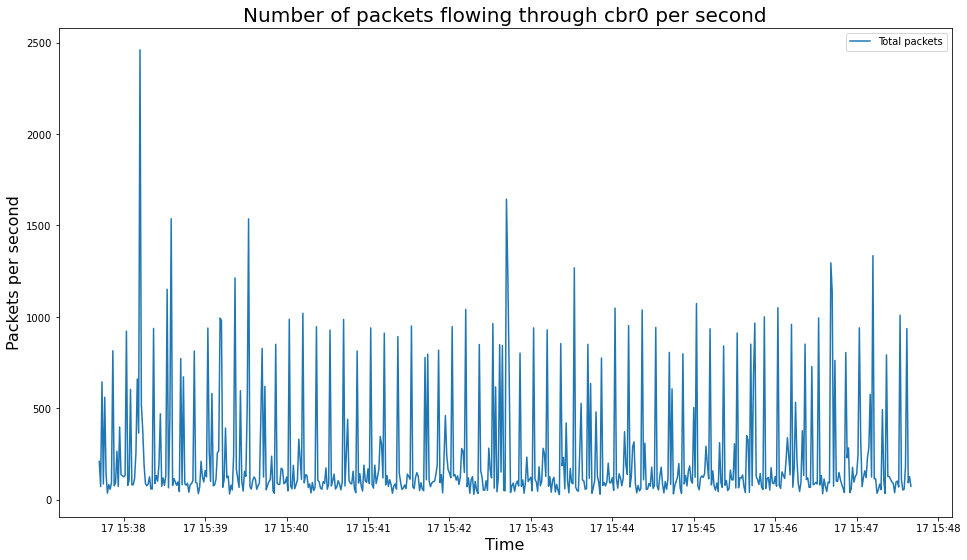

In [24]:
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(df['packet'], label = "Total packets")
plt.xlabel('Time', fontsize=16)
plt.ylabel('Packets per second',fontsize=16)
plt.title("Number of packets flowing through cbr0 per second", fontsize=20)
plt.legend()
plt.savefig("normal_packet_flow.jpg", dpi = 220, bbox_inches='tight')
plt.show()

In [10]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, max_samples='auto',contamination=float(0.01), verbose = 0)

In [11]:
model.fit(df.values)

IsolationForest(contamination=0.01)

In [12]:
resampled_time = attack_time['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
resampled_time_series = pd.to_datetime(resampled_time, format='%Y-%m-%d %H:%M:%S')

df_attack = pd.DataFrame(resampled_time_series)
df_attack['packet'] = 1

In [13]:
df_attack = df_attack.set_index('timestamp')
df_attack = df_attack.resample('1S').sum()

In [14]:
pred = model.predict(df_attack.values)

In [29]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
color_array = []

for x in list(pred):
    if x == -1:
        color_array.append('r')
    else:
        color_array.append('g')

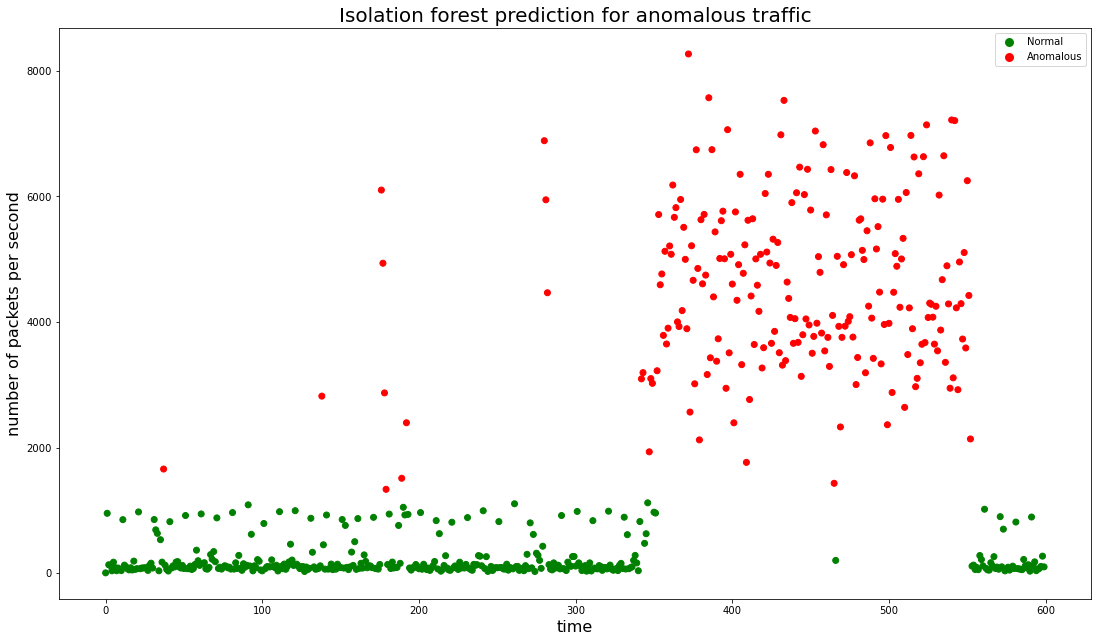

In [21]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='g', markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='Anomalous', markerfacecolor='r', markersize=10)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("time", fontsize=16)
plt.ylabel("number of packets per second", fontsize=16)
plt.title("Isolation forest prediction for anomalous traffic", fontsize=20)
plt.scatter([x for x in range(len(pred))], [x for x in list(df_attack['packet'])],color = color_array, label = "attack")
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig("isolation_forest.jpg", dpi = 220, bbox_inches='tight')

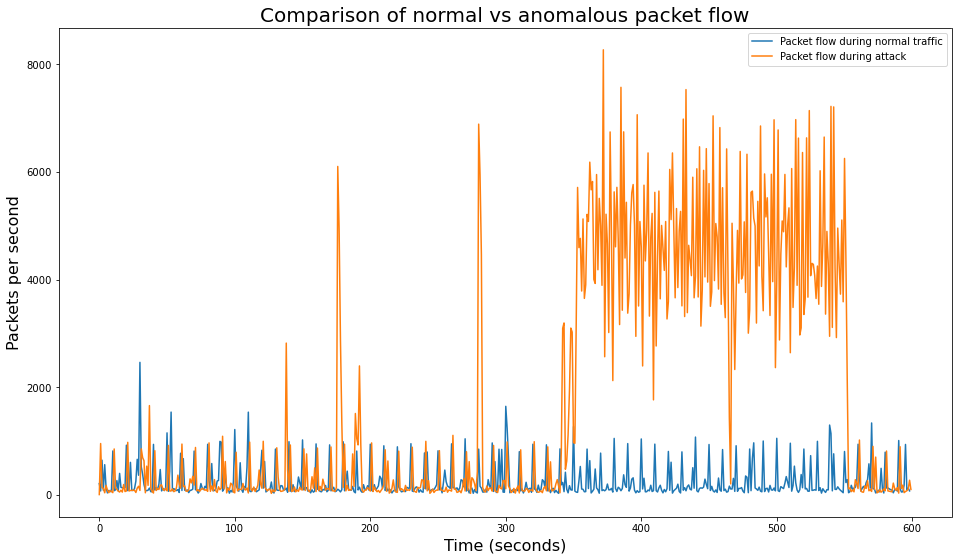

In [27]:
plt.rcParams["figure.figsize"] = (16,9)
plt.plot([x for x in range(len(df['packet']))], df['packet'], label = "Packet flow during normal traffic")
plt.plot([x for x in range(len(df_attack['packet']))], df_attack['packet'], label = "Packet flow during attack")
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Packets per second',fontsize=16)
plt.title("Comparison of normal vs anomalous packet flow", fontsize=20)
plt.legend()
plt.savefig("normal_vs_attack_packet_flow.jpg", dpi = 220, bbox_inches='tight')
plt.show()